<a href="https://colab.research.google.com/github/PabloAndree/Python_PA/blob/main/03_Pruebas_de_Hip%C3%B3tesis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://storage.googleapis.com/kaggle-datasets-images/1660669/2724653/194571a4f49254b35ba1c8fd6b6d6e07/dataset-cover.jpg?t=2021-10-20-14-39-34" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center"></div>

# **Laboratorio de Análisis de Pruebas A/B y Pruebas de Hipótesis**


## **Índice**

1. [Introducción](#1)
2. [Descripción del Conjunto de Datos](#2)
3. [Análisis Exploratorio de Datos](#3)
4. [Pruebas de Hipótesis y Aplicación](#4)
   - 4.1. Prueba de Hipótesis para una Muestra
   - 4.2. Prueba de Hipótesis para Dos Muestras Independientes
   - 4.3. Prueba de Hipótesis para Proporciones
5. [Conclusiones](#5)
6. [Desafío: Ejercicios de Práctica](#6)
7. [Referencias](#7)

---

---


<a name="1"></a>
## **1. Introducción**

El objetivo de este laboratorio es aplicar conceptos de pruebas de hipótesis en el contexto de una prueba A/B utilizando un conjunto de datos de marketing de Kaggle. En este análisis, buscamos entender si existe una diferencia significativa en la tasa de conversión entre dos grupos: aquellos expuestos a un anuncio de producto (`ad`) y aquellos que solo vieron un anuncio de servicio público (`psa`).




<a name="2"></a>
## **2. Descripción del Conjunto de Datos**

El conjunto de datos proviene de [Kaggle: Marketing A/B Testing](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing). Contiene datos de una prueba A/B que evaluó la efectividad de una estrategia de marketing.

**Variables principales:**

- `index`: Índice de la fila.
- `user id`: Identificador único de cada usuario.
- `test group`: Grupo al que pertenece el usuario. (`ad` para los que vieron un anuncio de producto y `psa` para los que vieron solo un anuncio de servicio público).
- `converted`: Indica si el usuario compró el producto (`True`) o no (`False`).
- `total ads`: Cantidad de anuncios que vio cada persona.
- `most ads day`: Día en que la persona vio la mayor cantidad de anuncios.
- `most ads hour`: Hora del día en que la persona vio la mayor cantidad de anuncios.


<a name="3"></a>
## **3. Análisis Exploratorio de Datos**

### **3.1. Importación de Librerías y Datos**


In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargar el conjunto de datos
df = pd.read_csv('/content/marketing_AB.csv',index_col=0)

### **3.2. Descripción de las Variables**


Primero, observamos las primeras filas del dataset para entender mejor la estructura de los datos:

In [5]:
df.head()


,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


## **3.3. Estadística Descriptivas**


Distribución de Usuarios por Grupo


In [ ]:
len(df)

588101

In [ ]:
N = 588101
desv = 0.5
Z = 1.96
# Z para 95% de confianza 1.96
error = 0.01
n = (Z**2)*(desv**2)*(N)/((error**2)*(N-1) + (Z**2)*(desv**2))
round(n)

9450

In [ ]:
df['test group'].value_counts()

,count
test group,
ad,564577
psa,23524


In [ ]:
# Distribución de Usuarios por Grupo
print("Distribución de Usuarios por Grupo:")
print(df['test group'].value_counts())


Distribución de Usuarios por Grupo:
test group
ad     564577
psa     23524
Name: count, dtype: int64


Tasa de Conversión por Grupo


In [ ]:
# Tasa de Conversión por Grupo
print("\nTasa de Conversión por Grupo:")
conversion_rates = df.groupby('test group')['converted'].mean()
print(conversion_rates)



Tasa de Conversión por Grupo:
test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


Análisis de Anuncios Totales y Hora de Máxima Exposición


In [ ]:
# Análisis de Anuncios Totales y Hora de Máxima Exposición por Grupo
print("\nAnálisis de Anuncios Totales y Hora de Máxima Exposición por Grupo:")
ads_stats = df.groupby('test group')[['total ads', 'most ads hour']].mean()
print(ads_stats)



Análisis de Anuncios Totales y Hora de Máxima Exposición por Grupo:
            total ads  most ads hour
test group                          
ad          24.823365      14.475900
psa         24.761138      14.304923


Este análisis nos permite observar las tasas de conversión en cada grupo y explorar las variables total ads y most ads hour para ver si existen diferencias iniciales en la interacción de los usuarios entre los dos grupos.

<a name="4"></a>
## **4. Pruebas de Hipótesis y Aplicación**

A continuación, se describen y aplican las pruebas de hipótesis para evaluar diferencias en la tasa de conversión entre el grupo ad y el grupo psa.

Aplicaremos pruebas de hipótesis para determinar si las diferencias observadas son estadísticamente significativas.


###**4.1. Prueba de Hipótesis para una Muestra**

**Pregunta:** ¿La media de anuncios vistos por usuario promedio en el grupo `psa` es igual al 22?

**Hipótesis:**

- **\(H_0\):** La media de anuncios vistos por usuario `psa` es igual al 22% (\( $\mu$
 = 22 \)).
- **\(H_a\):** La media de anuncios vistos por usuario `psa` es diferente al 22% (\( $\mu$
$\neq$22\)).


**Aplicación de la Prueba t para una Muestra (Grupo psa)**


In [ ]:
# Filtrar el grupo `psa`
psa_group = df[df['test group'] == 'psa']

# Datos del grupo `psa`
n_psa = len(psa_group)
mean_psa = psa_group['total ads'].mean()
std_psa = psa_group['total ads'].std(ddof=1)

print(f'Tamaño del grupo `psa`: {n_psa}')
print(f'Media del grupo `psa`: {mean_psa:.2f}')
print(f'Desviación estándar del grupo `psa`: {std_psa:.2f}')


Tamaño del grupo `psa`: 23524
Media del grupo `psa`: 24.76
Desviación estándar del grupo `psa`: 42.86


In [ ]:
from statsmodels.stats.weightstats import ztest
alpha = 0.05
#Z-test de una muestra
z_statistisc, p_value = ztest(psa_group['total ads'], value=22, alternative='two-sided')

if p_value < alpha:
  print('Se rechaza la hipotesis nula')
else:
  print('No se rechaza la hipotesis nula')

Se rechaza la hipotesis nula


In [ ]:
from statsmodels.stats.weightstats import ztest
alpha = 0.05
#Z-test de una muestra
z_statistisc, p_value = ztest(psa_group['total ads'], value=22, alternative='larger')

if p_value < alpha:
  print('Se rechaza la hipotesis nula')
else:
  print('No se rechaza la hipotesis nula')

Se rechaza la hipotesis nula


In [ ]:
# Parámetros de la hipótesis
mu_0 = 0.05  # Tasa de conversión esperada
alpha = 0.05

# Estadístico t
t_stat = (mean_psa - mu_0) / (std_psa / np.sqrt(n_psa))

# Grados de libertad y p-valor
df_psa = n_psa - 1
p_value = stats.t.sf(np.abs(t_stat), df=df_psa) * 2  # Prueba bilateral

print(f"\nPrueba de Hipótesis para una Muestra (Grupo `psa`):")
print(f"Estadístico t: {t_stat:.4f}")
print(f"p-valor: {p_value:.4f}")



Prueba de Hipótesis para una Muestra (Grupo `psa`):
Estadístico t: 88.4278
p-valor: 0.0000


Interpretación: Si el p-valor es menor que 0.05, rechazamos 𝐻0​
 , lo que indicaría una diferencia significativa entre la tasa de conversión del grupo psa y la tasa histórica del 5%.

### **4.2. Prueba de Hipótesis para Dos Muestras Independientes**


**Pregunta:** ¿Existe una diferencia significativa en la tasa de conversión entre los grupos `ad` y `psa`?

**Hipótesis:**

- **\( H_0 \):** Las tasas de conversión son iguales en ambos grupos $(\mu_{\text{ad}} = \mu_{\text{psa}}).$
- **\( H_a \):** Las tasas de conversión son diferentes $(\mu_{\text{ad}} \neq \mu_{\text{psa}}).$


**Aplicación de la Prueba t para Dos Muestras Independientes**


In [ ]:
# Filtrar el grupo `ad`
ad_group = df[df['test group'] == 'ad']

In [ ]:
# Datos del grupo `ad`
n_ad = len(ad_group)
mean_ad = ad_group['converted'].mean()
std_ad = ad_group['converted'].std(ddof=1)

In [ ]:
# Filtrar el grupo `ps`
psa_group = df[df['test group'] == 'psa']

In [ ]:
t_stat_ind, p_value_ind = stats.ttest_ind(psa_group['converted'], ad_group['converted'], equal_var=False)

In [ ]:
p_value_ind

5.107607598758945e-18

In [ ]:
alpha = 0.001

if p_value_ind < alpha:
  print('Se rechaza la hipotesis nula')
else:
  print('No se rechaza la hipotesis nula')

Se rechaza la hipotesis nula


In [ ]:
# Prueba t para muestras independientes (Welch's t-test si las varianzas no son iguales)
t_stat_ind, p_value_ind = stats.ttest_ind(
    psa_group['converted'],
    ad_group['converted'],
    equal_var=False  # Welch's t-test
)

print(f"\nPrueba de Hipótesis para Dos Muestras (Grupo `ad` vs Grupo `psa`):")
print(f"Estadístico t: {t_stat_ind:.2f}")
print(f"p-valor: {p_value_ind:.2f}")



Prueba de Hipótesis para Dos Muestras (Grupo `ad` vs Grupo `psa`):
Estadístico t: -8.66
p-valor: 0.00


Interpretación: Si el p-valor es menor que 0.05, rechazamos 𝐻0, lo que sugiere una diferencia significativa en la tasa de conversión entre los dos grupos.

### **4.3. Prueba de Hipótesis para Proporciones**


**Pregunta:** ¿Existe una diferencia significativa en la proporción de usuarios que convirtieron entre el grupo ad y el grupo psa?


**Hipótesis:**

- **\( H_0 \):** Las proporciones de conversión son iguales $(p_{\text{ad}} = p_{\text{psa}}).$
- **\( H_a \):** Las proporciones de conversión son diferentes $(p_{\text{ad}} \neq p_{\text{psa}}).$


**Aplicación de la Prueba Z para Proporciones**


In [ ]:
# Contadores de conversiones
success_psa = psa_group['converted'].sum()
success_ad = ad_group['converted'].sum()

# Tamaños de las muestras
p_psa = success_psa / n_psa
p_ad = success_ad / n_ad
p_pool = (success_psa + success_ad) / (n_psa + n_ad)

# Estadístico Z para proporciones
Z_stat = (p_psa - p_ad) / np.sqrt(p_pool * (1 - p_pool) * (1/n_psa + 1/n_ad))
p_value_prop = stats.norm.sf(np.abs(Z_stat)) * 2  # Prueba bilateral

print(f"\nPrueba de Hipótesis para Proporciones (Conversión Grupo `ad` vs Grupo `psa`):")
print(f"Estadístico Z: {Z_stat:.4f}")
print(f"p-valor: {p_value_prop:.4f}")



Prueba de Hipótesis para Proporciones (Conversión Grupo `ad` vs Grupo `psa`):
Estadístico Z: -7.3701
p-valor: 0.0000


Interpretación: Si el p-valor es menor que 0.05, rechazamos 𝐻0, indicando una diferencia significativa en las proporciones de conversión entre ambos grupos.

In [ ]:
np.corrcoef(ad_group['most ads hour'], ad_group['total ads'])

array([[ 1.        , -0.01090014],
       [-0.01090014,  1.        ]])

---

<a name="5"></a>
## **5. Conclusiones**

A partir de los resultados de las pruebas de hipótesis, determinaremos si las diferencias observadas en las tasas de conversión son estadísticamente significativas y si la exposición al anuncio de producto (`ad`) tiene un impacto en comparación con el anuncio de servicio público (`psa`).

---

<a name="6"></a>
## **6. Desafío: Ejercicios de Práctica**

Para afianzar lo aprendido, se proponen los siguientes ejercicios:

1. **Prueba de Hipótesis para una Muestra:**
   - Utiliza el grupo `ad` para verificar si su tasa de conversión es mayor al 7%.

2. **Prueba de Hipótesis para Dos Muestras (Total de Anuncios Vistos):**
   - Compara el número promedio de anuncios vistos entre los grupos `ad` y `psa`. ¿Es la diferencia significativa?

3. **Prueba de Hipótesis para Proporciones (Conversión en Horas Pico):**
   - Analiza si la proporción de conversiones durante la hora de mayor exposición es diferente entre los grupos.

4. **Visualización de Datos:**
   - Crea gráficos que representen las tasas de conversión y otras variables clave para visualizar las diferencias.

---

1. Prueba de Hipótesis para una Muestra:

Utiliza el grupo ad para verificar si su tasa de conversión es mayor al 7%.

Hipótesis:

(H_0): La tasa de conversión del grupo "ad" es mayor al 7%.

(H_a): La tasa de conversión del grupo "ad" es menor al 7%.

In [ ]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [26]:
df.describe()

,user id,total ads,most ads hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


In [ ]:
# Filtrar el grupo 'ad'
ad_group = df[df['test group'] == 'ad']

# Datos del grupo 'ad'
n_ad = len(ad_group)
mean_ad = ad_group['total ads'].mean()
std_ad = ad_group['total ads'].std(ddof=1)

print(f'Tamaño del grupo ad: {n_ad}')
print(f'Media del grupo ad: {mean_ad:.2f}')
print(f'Desviación estándar del grupo ad: {std_ad:.2f}')

Tamaño del grupo ad: 564577
Media del grupo ad: 24.82
Desviación estándar del grupo ad: 43.75


In [ ]:
# Tasa de Conversión del grupo
print("\nTasa de Conversión del grupo:")
conversion_rates = df.groupby('test group')['converted'].mean()
print(conversion_rates)


Tasa de Conversión del grupo:
test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


In [ ]:
from statsmodels.stats.weightstats import ztest
alpha = 0.05
#Z-test de una muestra
z_statistisc, p_value = ztest(ad_group['converted'], value=7, alternative='two-sided')

if p_value < alpha:
  print('Se rechaza la hipotesis nula')
else:
  print('No se rechaza la hipotesis nula')

Se rechaza la hipotesis nula


2. Prueba de Hipótesis para Dos Muestras (Total de Anuncios Vistos):

Compara el número promedio de anuncios vistos entre los grupos ad y psa. ¿Es la diferencia significativa?

**Hipótesis:**

- **\( H_0 \):** Los promedios de anuncios son iguales $(p_{\text{ad}} = p_{\text{psa}}).$
- **\( H_a \):** Los promedios de anuncios son diferentes $(p_{\text{ad}} \neq p_{\text{psa}}).$

In [ ]:
# Filtrar el grupo `ad`
ad_group = df[df['test group'] == 'ad']

# Datos del grupo `ad`
n_ad = len(ad_group)
mean_ad = ad_group['total ads'].mean()
std_ad = ad_group['total ads'].std(ddof=1)

print(f'Tamaño del grupo ad: {n_ad}')
print(f'Media del grupo ad: {mean_ad:.2f}')
print(f'Desviación estándar del grupo ad: {std_ad:.2f}')

Tamaño del grupo ad: 564577
Media del grupo ad: 24.82
Desviación estándar del grupo ad: 43.75


In [ ]:
# Filtrar el grupo `ps`
psa_group = df[df['test group'] == 'psa']

# Datos del grupo `ps`
n_psa = len(psa_group)
mean_psa = psa_group['total ads'].mean()
std_psa = psa_group['total ads'].std(ddof=1)

print(f'Tamaño del grupo psa: {n_psa}')
print(f'Media del grupo psa: {mean_psa:.2f}')
print(f'Desviación estándar del grupo psa: {std_psa:.2f}')

Tamaño del grupo psa: 23524
Media del grupo psa: 24.76
Desviación estándar del grupo psa: 42.86


In [ ]:
# Prueba t para muestras independientes (Welch's t-test si las varianzas no son iguales)
t_stat_ind, p_value_ind = stats.ttest_ind(psa_group['total ads'],
                                          ad_group['total ads'],
                                          equal_var=False)


In [ ]:
alpha = 0.05

if p_value_ind < alpha:
  print('Se rechaza la hipotesis nula')
else:
  print('No se rechaza la hipotesis nula')

No se rechaza la hipotesis nula


3. Prueba de Hipótesis para Proporciones (Conversión en Horas Pico):

Analiza si la proporción de conversiones durante la hora de mayor exposición es diferente entre los grupos.

(H_0): La proporción de conversiones durante la hora de mayor exposición del grupo "ad" es diferente al del grupo "psd"

(H_a): La proporción de conversiones durante la hora de mayor exposición del grupo "ad" es igual al del grupo "psd"


In [4]:
# Análisis de Conversiones y Hora de Máxima Exposición por Grupo
print("\nAnálisis de Conversiones y Hora de Máxima Exposición por Grupo:")
ads_stats = df.groupby('test group')[['converted', 'most ads hour']].mean()
print(ads_stats)


Análisis de Conversiones y Hora de Máxima Exposición por Grupo:
            converted  most ads hour
test group                          
ad           0.025547      14.475900
psa          0.017854      14.304923


In [6]:
# Filtrar el grupo `ad`
ad_group = df[df['test group'] == 'ad']

# Filtrar por la hora de mayor exposición
ad_group = ad_group[ad_group['most ads hour'] == 23]


In [8]:
n_ad = len(ad_group)
print(n_ad)

19547


In [11]:
# Filtrar el grupo `ps`
psa_group = df[df['test group'] == 'psa']

# Filtrar por la hora de mayor exposición
psa_group = psa_group[psa_group['most ads hour'] == 23]

In [12]:
n_psa = len(psa_group)
print(n_psa)

619


In [15]:
# Contadores de conversiones
success_psa = psa_group['converted'].sum()
success_ad = ad_group['converted'].sum()

# Tamaños de las muestras (proporsiones)
p_psa = success_psa / n_psa
p_ad = success_ad / n_ad

#Proporsiones combinadas
p_pool = (success_psa + success_ad) / (n_psa + n_ad)

# Estadístico Z para proporciones
Z_stat = (p_psa - p_ad) / np.sqrt(p_pool * (1 - p_pool) * (1/n_psa + 1/n_ad))
p_value_prop = stats.norm.sf(np.abs(Z_stat)) * 2  # Prueba bilateral

print(f"\nPrueba de Hipótesis para Proporciones (Conversión Grupo `ad` vs Grupo `psa`):")
print(f"Estadístico Z: {Z_stat:.2f}")
print(f"p-valor: {p_value_prop:.2f}")

alpha = 0.05

if p_value_prop < alpha:
  print('Se rechaza la hipotesis nula')
else:
  print('No se rechaza la hipotesis nula')


Prueba de Hipótesis para Proporciones (Conversión Grupo `ad` vs Grupo `psa`):
Estadístico Z: -1.65
p-valor: 0.10
No se rechaza la hipotesis nula


In [18]:
df

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


4. Visualización de Datos:

Crea gráficos que representen las tasas de conversión y otras variables clave para visualizar las diferencias.

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=df, x='', y="bill_length_mm", hue="test group", ax=axs[0])
sns.histplot(data=df, x="test group", hue="test group", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

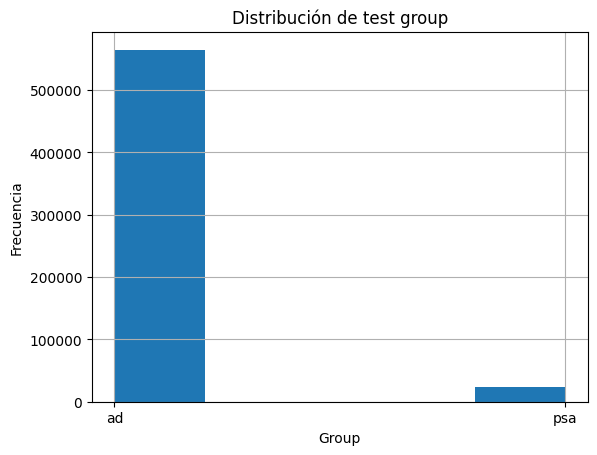

In [17]:
# Histograma del test group para visualizar la distribución.
df['test group'].hist(bins=5)
plt.title("Distribución de test group")
plt.xlabel("Group")
plt.ylabel("Frecuencia")
plt.show()


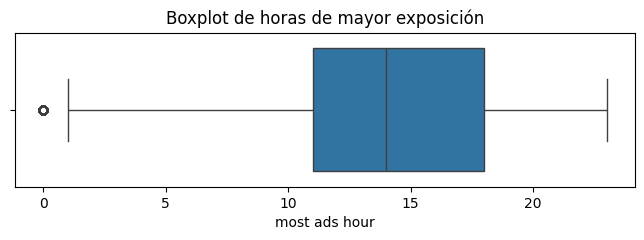

In [21]:
# Boxplot de las horas de mayor exposición.
plt.figure(figsize=(8,2))
sns.boxplot(x='most ads hour', data=df)
plt.title("Boxplot de horas de mayor exposición")
plt.show()

<Axes: ylabel='most ads hour'>

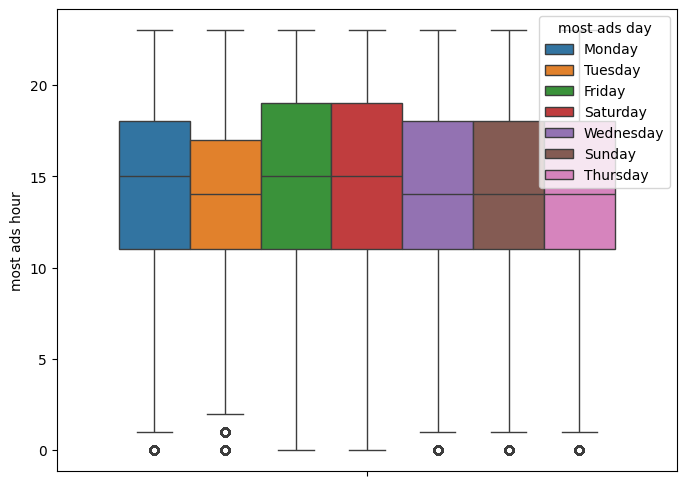

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(y='most ads hour', data=df, orient='y', hue='most ads day')

<Figure size 1000x800 with 0 Axes>

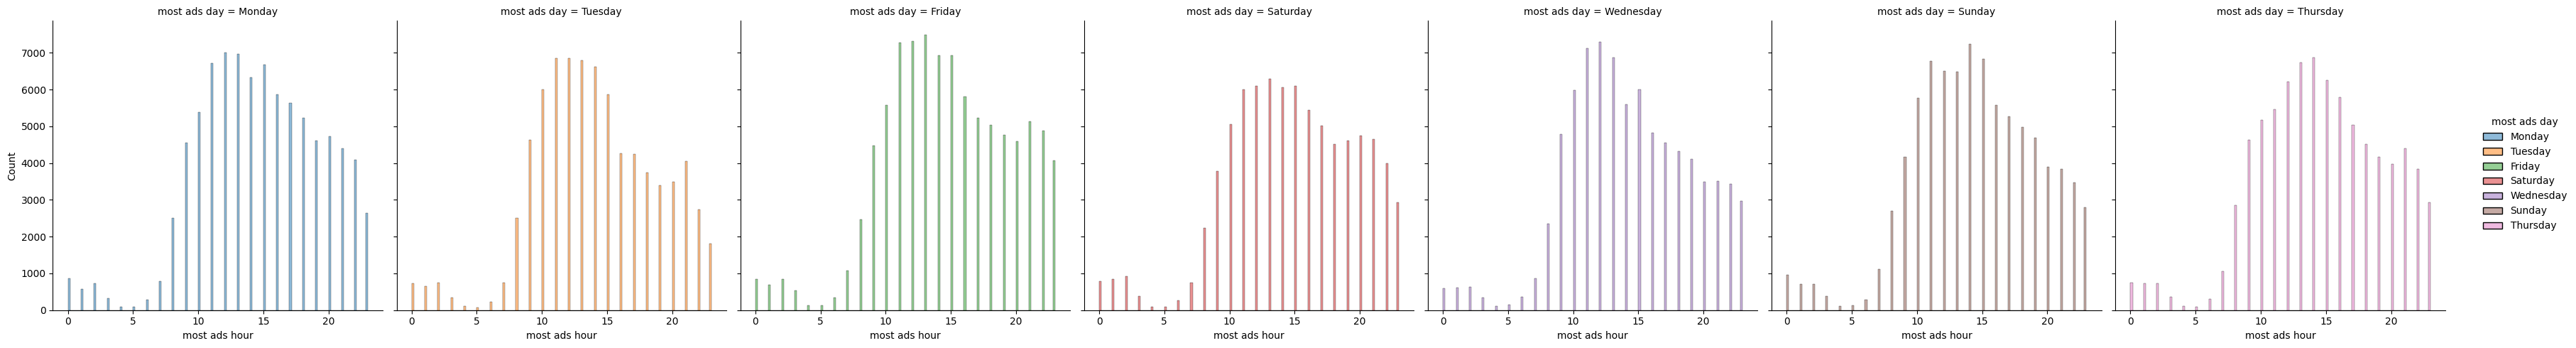

In [29]:
plt.figure(figsize=(10,8))
sns.displot(data=df, x='most ads hour', hue='most ads day', col='most ads day')


<a name="7"></a>
## **7. Referencias**

- Montgomery, D. C., & Runger, G. C. (2014). **Applied Statistics and Probability for Engineers**. Wiley.
- Rice, J. A. (2006). **Mathematical Statistics and Data Analysis**. Cengage Learning.
- Kaggle Dataset: [Marketing A/B Testing](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing)

---